In [200]:
import numpy as np
import matplotlib.pyplot as plt


In [201]:
from sklearn.svm import  SVC
from sklearn.datasets import load_iris

iris = load_iris()
X = iris['data'][:,(2,3)]
y = iris['target']

X = X[(y==0)|(y==1)]
y = y[(y==0)|(y==1)]

#使用线性的核函数即不变更函数,不考虑C
svm_clf = SVC(kernel='linear',C=float('inf'))
svm_clf.fit(X,y)

SVC(C=inf, kernel='linear')

[-3.78823471]
200 200


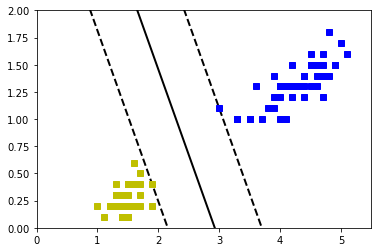

In [202]:
#绘制决策边界
def plot_svc_decision_boundary(clf,xmin,xmax,sv=True):
    #直接从模型中取w,b
    w = clf.coef_
    b = clf.intercept_
    x0  = np.linspace(xmin,xmax,200)
    
    #x0w0+x1w1+b=0
    decision_boundary = -w[0][0]/w[0][1]*x0 - b/w[0][1]
    print(b)
    #margin
    margin = 1/w[0][1]
    
    gutter_up = decision_boundary+margin
    gutter_down = decision_boundary-margin
    
    #获得支持向量
    if sv:
        svs = svm_clf.support_vectors_
        plt.scatter(svs[:,0],svs[:,1],facecolors='#FFAAAA')
    print(x0.shape[0],decision_boundary.shape[0])
    plt.plot(x0,decision_boundary,'k-',linewidth=2)
    
    plt.plot(x0,gutter_up,'k--',linewidth=2)
    plt.plot(x0,gutter_down,'k--',linewidth=2)

plot_svc_decision_boundary(svm_clf,0,5.5)
plt.plot(X[:,0][y==1],X[:,1][y==1],'bs')
plt.plot(X[:,0][y==0],X[:,1][y==0],'ys')
plt.axis([0,5.5,0,2])
plt.show()

### 软间隔

In [203]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris()
X = iris['data'][:,(2,3)]
y = (iris['target']==2).astype(np.float64)

svm_clf = Pipeline((
    ('std',StandardScaler()),
    ('liner_clf',LinearSVC(C=1))
))
svm_clf.fit(X,y)



Pipeline(steps=[('std', StandardScaler()), ('liner_clf', LinearSVC(C=1))])

In [204]:
svm_clf.predict([[5.5,1.7]])

array([1.])

In [205]:
scaler = StandardScaler()

svm_clf1= LinearSVC(C=1,random_state=42)
svm_clf2= LinearSVC(C=100,random_state=42)

scaled_svm_clf1 = Pipeline((
    ('std',scaler),
    ('liner_clf',svm_clf1)
))

scaled_svm_clf2 = Pipeline((
    ('std',scaler),
    ('liner_clf',svm_clf2)
))

scaled_svm_clf1.fit(X,y)
scaled_svm_clf2.fit(X,y)


d:\code\anaconda\envs\test\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('std', StandardScaler()),
                ('liner_clf', LinearSVC(C=100, random_state=42))])

In [206]:
b1 = svm_clf1.decision_function([-scaler.mean_/scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_/scaler.scale_])
w1 = svm_clf1.coef_[0]/scaler.scale_
w2 = svm_clf2.coef_[0]/scaler.scale_
svm_clf1.intercept_ = np.array(b1)
svm_clf2.intercept_ = np.array(b2)
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])
#注意，模型中使用的是标准化后的参数，所以画出的东西也是标准化后的东西
scaler.mean_

array([3.758     , 1.19933333])

[-7.91668565]
200 200
[-13.6864355]
200 200


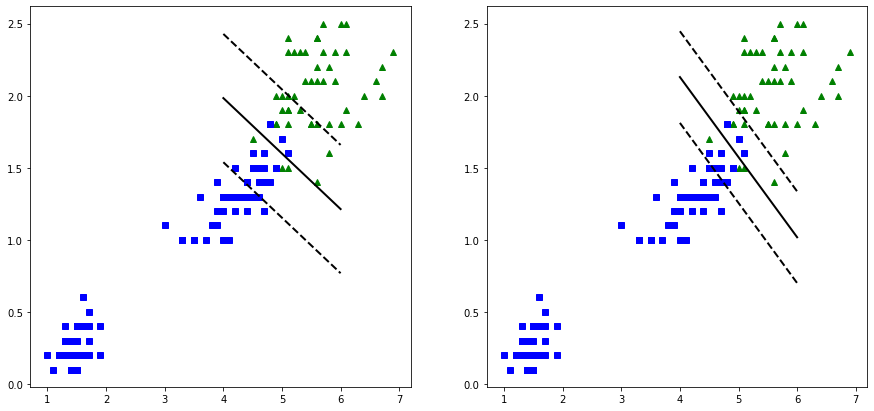

In [207]:
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.plot(X[:,0][y==1],X[:,1][y==1],'g^')
plt.plot(X[:,0][y==0],X[:,1][y==0],'bs')
plot_svc_decision_boundary(svm_clf1,4,6,sv=False)
plt.subplot(122)
plt.plot(X[:,0][y==1],X[:,1][y==1],'g^')
plt.plot(X[:,0][y==0],X[:,1][y==0],'bs')
plot_svc_decision_boundary(svm_clf2,4,6,sv=False)

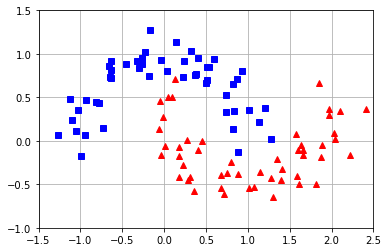

In [208]:
from sklearn.datasets import make_moons
X , y  = make_moons(n_samples=100,noise=0.15,random_state=42)

def plot_datasets(X,y,axes):
    plt.plot(X[:,0][y==0],X[:,1][y==0],"bs")
    plt.plot(X[:,0][y==1],X[:,1][y==1],"r^")
    plt.axis(axes)
    plt.grid(True,which='both')

plot_datasets(X,y,[-1.5,2.5,-1,1.5])
plt.show()

d:\code\anaconda\envs\test\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


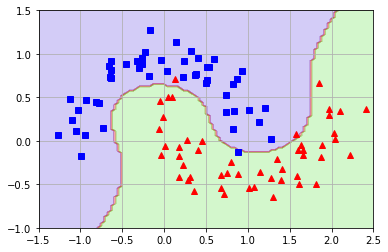

In [209]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline((
    ('ploy',PolynomialFeatures(degree=3)),
    ('scaler',StandardScaler()),
    ('svm_clf',LinearSVC(C=10,loss='hinge'))
))
polynomial_svm_clf.fit(X,y)


def plot_predictions(clf,axes):
    x0s = np.linspace(axes[0],axes[1],100)
    x1s = np.linspace(axes[2],axes[3],100)
    
    x0,x1 = np.meshgrid(x0s,x1s)
    X = np.c_[x0.ravel(),x1.ravel()]
    y_pre = clf.predict(X).reshape(x0.shape)
    
    plt.contourf(x0,x1,y_pre,cmap=plt.cm.brg,alpha=0.2)
    
plot_predictions(polynomial_svm_clf,[-1.5,2.5,-1,1.5])
plot_datasets(X,y,[-1.5,2.5,-1,1.5])
plt.show()


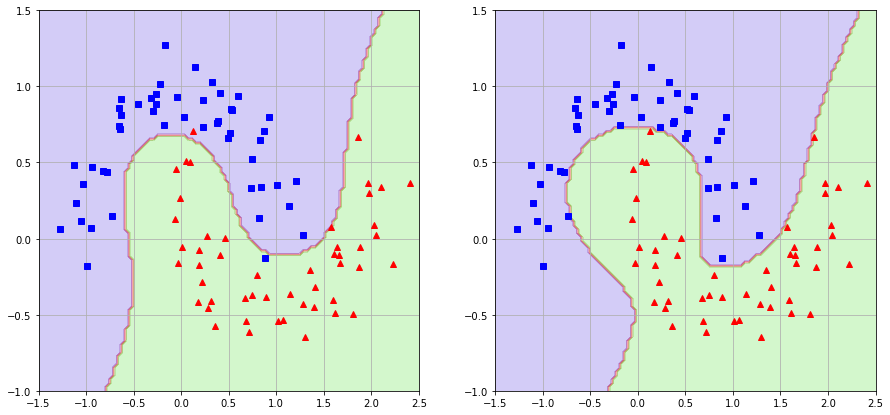

In [215]:
from sklearn.svm import SVC
# kernel ---- 核函数(liner,poly(多项式),rbf)


poly_kernel_svm_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('svm',SVC(kernel='poly',degree=3,coef0=1,C=5))
])
poly100_kernel_svm_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('svm',SVC(kernel='poly',degree=10,coef0=100,C=5))
])

poly_kernel_svm_clf.fit(X,y)
poly100_kernel_svm_clf.fit(X,y)

plt.figure(figsize=(15,7))
plt.subplot(121)
plot_predictions(poly_kernel_svm_clf,[-1.5,2.5,-1,1.5])
plot_datasets(X,y,[-1.5,2.5,-1,1.5])

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf,[-1.5,2.5,-1,1.5])
plot_datasets(X,y,[-1.5,2.5,-1,1.5])
plt.show()

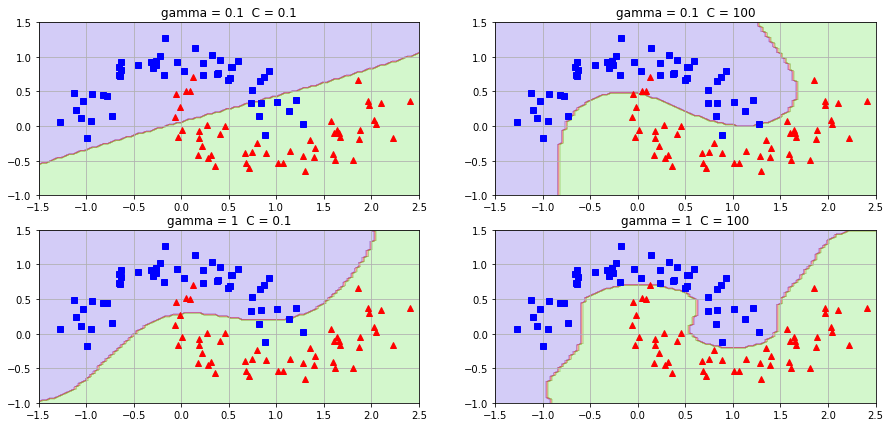

In [221]:
gamma1 , gamma2 = 0.1 ,1
C1 ,C2 = 0.1,100
hyperparams = [(gamma1,C1),(gamma1,C2),(gamma2,C1),(gamma2,C2)]

rbf_clf_list = []

for gamma , C in hyperparams:
    rbf_kernel_svm_clf= Pipeline((
        ('scaler',StandardScaler()),
        ('svm',SVC(kernel='rbf',C=C,gamma= gamma))
    ))
    rbf_kernel_svm_clf.fit(X,y)
    rbf_clf_list.append(rbf_kernel_svm_clf)

plt.figure(figsize=(15,7))

for i,svm_clf in enumerate(rbf_clf_list):
    plt.subplot(221+i)
    plot_predictions(svm_clf,[-1.5,2.5,-1,1.5])
    plot_datasets(X,y,[-1.5,2.5,-1,1.5])
    plt.title(f'gamma = {hyperparams[i][0]}  C = {hyperparams[i][1]}')
plt.show()